In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
a=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
a.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
a.shape

(16719, 16)

In [5]:
a.info()

#With the help of info() function we get the information regarding our DataFrame.
#i.e Total number of columns are 16, titles of the columns its data types, non-null value count, range index i.e total entries of the column here it is 18495.`
#It is a useful function for the further operations on our datasets i.e Visualization, Finding missing values, Duplicate values etc. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
a.isnull().sum()

# Using isnull function we get the missing values i.e null values.
#In my datasets following columns have null values which we are going to replaced or dropped using functions.

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
a.isnull().sum()/len(a)*100

#Using this we get the percentage of null values if it is more than 40% then we have to drop the column

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

In [8]:
clear= ['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating']
df=a.drop(labels=clear, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [9]:
# droping the 'Critic_Score','Critic_Count','User_Score','User_Count','Rating' 
#columns since its null value is more than 40%

In [10]:
df.dropna(inplace=True)
#droping the null values

In [11]:
df.isnull().sum()/len(df)*100

Name               0.0
Platform           0.0
Year_of_Release    0.0
Genre              0.0
Publisher          0.0
NA_Sales           0.0
EU_Sales           0.0
JP_Sales           0.0
Other_Sales        0.0
Global_Sales       0.0
dtype: float64

# So now the data is clean there is no null values present

In [12]:
g=df.groupby('Publisher')
g

In [13]:
for Publisher,data in g:
    print(Publisher)
    print("*"*60)
    print(data)
    print("*"*60)

10TACLE Studios
************************************************************
                                         Name Platform  Year_of_Release  \
12380                          Panzer Tactics       DS           2007.0   
14665                    Boulder Dash: Rocks!       DS           2007.0   
15807  Pirates: Legend of the Black Buccaneer      PS2           2006.0   

           Genre        Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
12380   Strategy  10TACLE Studios      0.06      0.00       0.0          0.0   
14665     Puzzle  10TACLE Studios      0.00      0.03       0.0          0.0   
15807  Adventure  10TACLE Studios      0.01      0.01       0.0          0.0   

       Global_Sales  
12380          0.06  
14665          0.03  
15807          0.02  
************************************************************
1C Company
************************************************************
                                  Name Platform  Year_of_Release  \
12991       

In [14]:
# it distributes the data in a way it first gives publishers name and then game it has created

In [15]:
#To see the frequency of Publisher
df['Publisher'].value_counts()

Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          930
Konami Digital Entertainment     825
                                ... 
Max Five                           1
On Demand                          1
Bomb                               1
Detn8 Games                        1
Red Flagship                       1
Name: Publisher, Length: 579, dtype: int64

In [16]:
#Here are the top 5 publisher who have made more games then any other publisher
df["Publisher"].value_counts()[:5]

Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          930
Konami Digital Entertainment     825
Name: Publisher, dtype: int64

In [17]:
#Electronic Arts has created more games
#since Electronic Arts has highest number of games so calculating its average global sale
df[df["Publisher"]=="Electronic Arts"]["Global_Sales"].mean()

0.8184895833333333

In [18]:
x=df['Platform'].value_counts()
x

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [19]:
# PS2 is most preffered gaming platform with DS and PS3 behind at no.2 and no.3
#And PCFX and GG is the least preffered platform

In [20]:
x.head(5) #top five gaming platform

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
Name: Platform, dtype: int64

In [21]:
x.tail(5) #botton five gaming platform

WS      6
3DO     3
TG16    2
GG      1
PCFX    1
Name: Platform, dtype: int64

In [22]:
df['Genre'].value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

In [23]:
#There are more Action based genre game compare to others
#That means people prefer action based games 

In [24]:
# All the Games based on Action genre
an=df['Name'].loc[(df['Genre']=='Action')]  
an

16                      Grand Theft Auto V
17           Grand Theft Auto: San Andreas
23                      Grand Theft Auto V
24             Grand Theft Auto: Vice City
38                    Grand Theft Auto III
                       ...                
16696    Metal Gear Solid V: Ground Zeroes
16698                       Carmageddon 64
16699                      Planet Monsters
16703                The Longest 5 Minutes
16714        Samurai Warriors: Sanada Maru
Name: Name, Length: 3307, dtype: object

In [25]:
df[df["Genre"]=="Action"]["Global_Sales"].mean()

0.5193891744783792

In [26]:
# 0.51% is the average sale of game based on Action genre


In [27]:
df['Genre'].size

16416

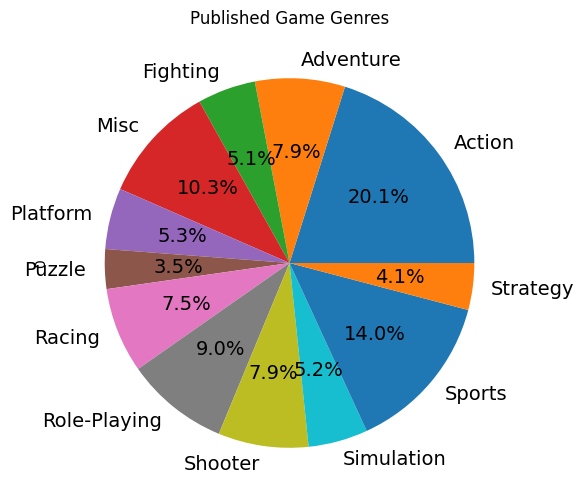

In [28]:
gdf=df[["Genre"]]
genre_group=gdf.groupby(['Genre']).size().reset_index()

genre_group.plot(kind='pie',y = 0,autopct='%1.1f%%',  title = "Published Game Genres",
 labels=genre_group['Genre'], legend = False, fontsize=14, figsize=(6,6))

plt.show()

In [29]:
x=df['Global_Sales'].max()
df[df["Global_Sales"]==x]["Name"]

0    Wii Sports
Name: Name, dtype: object

In [30]:
# Wii Sports is the highest played game with highes global sales


In [31]:
#Which region plays more game
df['NA_Sales'].mean()

0.26412889863547756

In [32]:
df['EU_Sales'].mean()

0.14603374756335283

In [33]:
df['JP_Sales'].mean()

0.07862268518518518

In [34]:
df['Other_Sales'].mean()

0.04766995614035088

In [35]:
#So North American region has highest average of Game enthusiast from rest of the world followed by Eu

In [36]:

#Showing data of Game with its sale in each region with its global sales
d=pd.DataFrame(df.iloc[:,[0,4,5,6,7,9]])
d

,Name,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii Sports,Nintendo,41.36,28.96,3.77,82.53
1,Super Mario Bros.,Nintendo,29.08,3.58,6.81,40.24
2,Mario Kart Wii,Nintendo,15.68,12.76,3.79,35.52
3,Wii Sports Resort,Nintendo,15.61,10.93,3.28,32.77
4,Pokemon Red/Pokemon Blue,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,Tecmo Koei,0.00,0.00,0.01,0.01
16715,LMA Manager 2007,Codemasters,0.00,0.01,0.00,0.01
16716,Haitaka no Psychedelica,Idea Factory,0.00,0.00,0.01,0.01
16717,Spirits & Spells,Wanadoo,0.01,0.00,0.00,0.01


In [37]:

#Sorting the data to get top 10 best selling game globally

dd=df.sort_values(by=['Global_Sales'], ascending=False)
dd.head(10)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


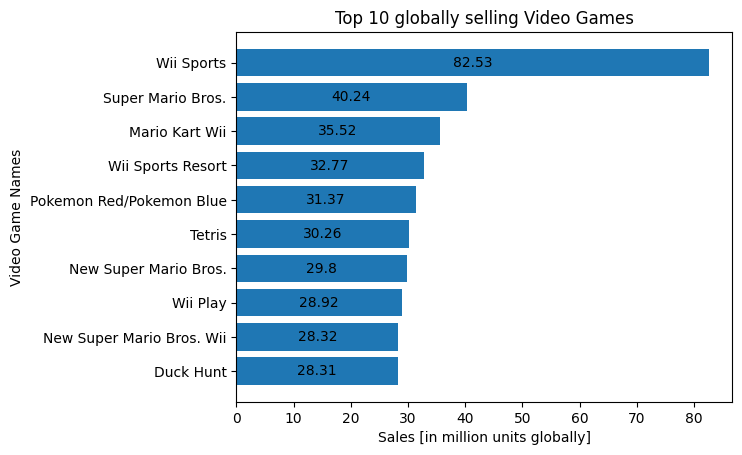

In [38]:
dd1=dd.head(10).sort_values(by=['Global_Sales'], ascending = True)
game=dd1['Name'].head(10)
sale=dd1['Global_Sales'].head(10)

fig, ax=plt.subplots()
p1=ax.barh(game,sale)
ax.set_title('Top 10 globally selling Video Games')
ax.set_xlabel('Sales [in million units globally]')
ax.set_ylabel('Video Game Names')
ax.bar_label(p1, label_type='center')

plt.show()

In [39]:
# So Wii sports is the best selling game globally with more than 80 million units and second is Super Mario bros with 40.24 million units
# All the top 10 games are created by Nintendo

In [40]:
#Since nintendo is has the top 10 best selling game
#list of games Nintendo has produce
an=df['Name'].loc[(df['Publisher']=='Nintendo')]  
an

0                                               Wii Sports
1                                        Super Mario Bros.
2                                           Mario Kart Wii
3                                        Wii Sports Resort
4                                 Pokemon Red/Pokemon Blue
                               ...                        
16514                             Art Academy: Home Studio
16579                                      Captain Rainbow
16612    Mario & Luigi: Paper Jam & Mario Kart 7 Double...
16656                                     Fast Racing Neo 
16657    Nintendogs and Cats Golden Retriever and New F...
Name: Name, Length: 700, dtype: object

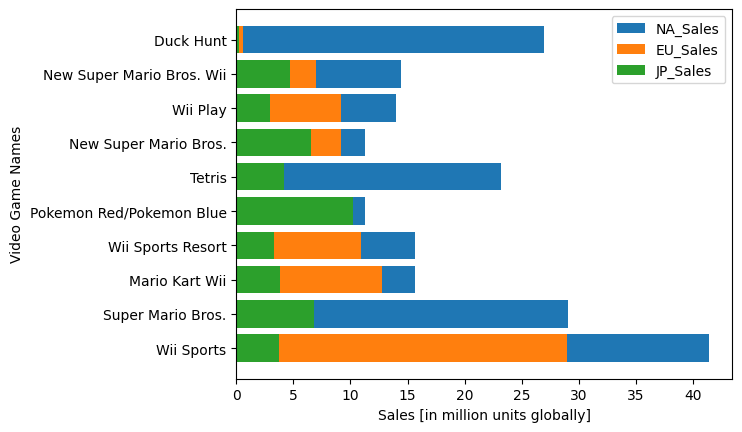

In [41]:
#Since Wii Sports is the best selling game Globally but is it true in each region of world


fig, ax=plt.subplots()
p=ax.barh(df['Name'].head(10),df['NA_Sales'].head(10))
p2=ax.barh(df['Name'].head(10),df['EU_Sales'].head(10))
p3=ax.barh(df['Name'].head(10),df['JP_Sales'].head(10))
ax.set_xlabel('Sales [in million units globally]')
ax.set_ylabel('Video Game Names')
ax.legend(['NA_Sales','EU_Sales','JP_Sales'])
plt.show()


In [42]:
#Blue bar indicates NA_sales region
#Orange bar indicates EU_Sales region
#Green bar indicates JP_Sales region

#Wii Sports is best selling game in both NA and EU region, but not in JP region.
#Pokemon Red/Pokemon Blue is the best selling game in JP region


In [43]:
#More than half units of Wii sports were sell in NOrth america than why it does not make in top 5 in japan
#So show the correlation between global and regional sales

corr_s= df.corr()
corr_s.head(6)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,1.000000,-0.092346,0.003922,-0.168614,0.037686,-0.076337
NA_Sales,-0.092346,1.000000,0.766539,0.451175,0.638502,0.941238
EU_Sales,0.003922,0.766539,1.000000,0.435877,0.722679,0.901665
JP_Sales,-0.168614,0.451175,0.435877,1.000000,0.291489,0.613305
Other_Sales,0.037686,0.638502,0.722679,0.291489,1.000000,0.748907
Global_Sales,-0.076337,0.941238,0.901665,0.613305,0.748907,1.000000


In [44]:
#droping the year of release column
corr_s=corr_s.drop(['Year_of_Release'], axis=1)
corr_s =corr_s.drop(corr_s.index[0], axis=0)
corr_s.head(6)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.766539,0.451175,0.638502,0.941238
EU_Sales,0.766539,1.000000,0.435877,0.722679,0.901665
JP_Sales,0.451175,0.435877,1.000000,0.291489,0.613305
Other_Sales,0.638502,0.722679,0.291489,1.000000,0.748907
Global_Sales,0.941238,0.901665,0.613305,0.748907,1.000000


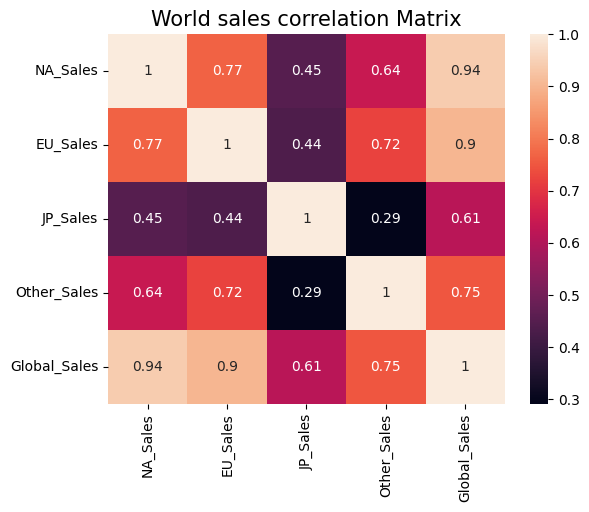

In [45]:
fig,ax = plt.subplots()
sns.heatmap(corr_s, annot=True)
ax.set_title('World sales correlation Matrix', fontsize=15)
plt.show()

In [46]:
#So it seems that major global sales are done by North america and Europe
#Sales in Europe,North America and other region have average high corelation it could be that those region have same type games,
#or like same type of games.This explain why Wii sports isn't top selling game in Japan since maybe people in those region prefer
#different type of game

In [47]:

#To see which are the best two games from each genre in each region
sna=pd.DataFrame(df.groupby('Genre')['NA_Sales'].nlargest(2))
sna

NA_Sales
Genre                     
Action       23       9.66
             17       9.43
Adventure    50       6.16
             160      3.28
Fighting     39       6.62
             111      4.41
Misc         14      15.00
             7       13.96
Platform     1       29.08
             8       14.44
Puzzle       5       23.20
             89       7.28
Racing       2       15.68
             11       9.71
Role-Playing 4       11.27
             12       9.00
Shooter      9       26.93
             32       9.70
Simulation   10       9.05
             195      3.22
Sports       0       41.36
             3       15.61
Strategy     168      3.18
             206      2.79

In [48]:
seu=pd.DataFrame(df.groupby('Genre')['EU_Sales'].nlargest(2))
seu

EU_Sales
Genre                     
Action       16       9.09
             42       6.31
Adventure    521      2.79
             50       2.04
Fighting     39       2.55
             106      2.22
Misc         19       9.20
             7        9.18
Platform     6        9.14
             8        6.94
Puzzle       26       5.35
             188      2.43
Racing       2       12.76
             11       7.47
Role-Playing 4        8.89
             138      6.21
Shooter      31       5.86
             34       5.73
Simulation   10      10.95
             85       6.42
Sports       0       28.96
             3       10.93
Strategy     273      2.27
             206      1.89

In [49]:
sjp=pd.DataFrame(df.groupby('Genre')['JP_Sales'].nlargest(2))
sjp

JP_Sales
Genre                      
Action       46        3.96
             406       2.79
Adventure    50        2.69
             252       1.61
Fighting     137       2.87
             39        2.66
Misc         19        4.16
             340       3.67
Platform     1         6.81
             6         6.50
Puzzle       26        5.32
             5         4.22
Racing       11        4.13
             76        3.81
Role-Playing 4        10.22
             12        7.20
Shooter      247       1.46
             1233      1.27
Simulation   43        5.33
             73        4.39
Sports       0         3.77
             13        3.60
Strategy     1146      1.61
             339       1.38

In [50]:
#Average sales of each genre game in each region

In [51]:
na=pd.DataFrame(df.groupby('Genre')['NA_Sales'].mean())
na

,NA_Sales
Genre,
Action,0.261013
Adventure,0.078536
Fighting,0.263453
Misc,0.232180
Platform,0.506196
Puzzle,0.212882
Racing,0.291314
Role-Playing,0.222549
Shooter,0.451258


In [52]:
eu=pd.DataFrame(df.groupby('Genre')['EU_Sales'].mean())
eu

,EU_Sales
Genre,
Action,0.154518
Adventure,0.048916
Fighting,0.118280
Misc,0.122893
Platform,0.227096
Puzzle,0.087487
Racing,0.191412
Role-Playing,0.126932
Shooter,0.242685


In [53]:
jp=pd.DataFrame(df.groupby('Genre')['JP_Sales'].mean())
jp

,JP_Sales
Genre,
Action,0.048425
Adventure,0.040449
Fighting,0.104277
Misc,0.063064
Platform,0.148872
Puzzle,0.099613
Racing,0.046229
Role-Playing,0.238328
Shooter,0.029846


In [54]:
#Shooter genre game has most sales in both NA and EU region while ROle-paying is JP region

In [55]:
df[df['Genre']=='Shooter']['NA_Sales'].mean()

0.45125771604938264

In [56]:
#45% sales are based on action genre game

In [57]:
df[df['Genre']=='Shooter']['EU_Sales'].mean()

0.24268518518518517

In [58]:
#24% sales are based on action genre game

In [59]:
df[df['Genre']=='Role-Playing']['JP_Sales'].mean()

0.23832771409305462

In [60]:
#23% sales are based on Role-PLaying genre game

In [61]:
#TO see which platform is dominating over the years
platform_df = pd.DataFrame()
platform_df =df[(df['Platform']=='PS')|(df['Platform']=='PS2')|(df['Platform']=='PS3')|(df['Platform']=='PS4')|(df['Platform']=='XB')
                |(df['Platform']=='X360')|(df['Platform']=='XOne')|(df['Platform']=='Wii')
                         |(df['Platform']=='WiiU')|(df['Platform']=='DS')]
top=pd.DataFrame(platform_df.groupby(['Year_of_Release','Platform'])['Global_Sales'].sum())
top.head(10)

Global_Sales
Year_of_Release Platform              
1985.0          DS                0.02
1994.0          PS                6.02
1995.0          PS               35.92
1996.0          PS               94.68
1997.0          PS              136.08
1998.0          PS              169.58
1999.0          PS              144.57
2000.0          PS               96.30
                PS2              39.11
                XB                0.99

In [62]:
#This shows PS is the best selling platform over the significant time and dominated most of the market

<AxesSubplot: xlabel='Year_of_Release'>

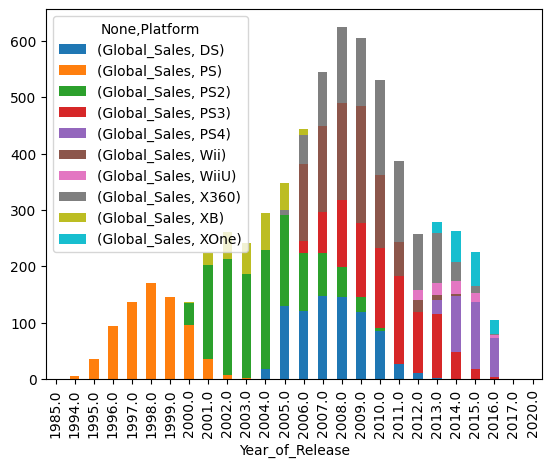

In [63]:
top.unstack().plot(kind='bar',stacked=True)
#Shows platform changes over years

In [64]:
#In start Playstation dominated then PS2,then Microsofts Xone came into play then PS3 and then PS4.
#Though time is passing PS4 is taking more and more of market